# Analysis of Australia's Renewable Energy Index values over time

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd 
Values = [1,1.113572,1.075245,1.15586,1.143912,1.116324,1.098268,1.175124,1.104041,1.167808,1.180695,1.21909,1.199758,1.249765,1.254061,1.349376,1.452678,1.410458,1.32407,1.248624,1.457981,1.763525,1.766546,2.195194,2.42395,2.243455,2.49369,2.698886,2.987448]

df = pd.Series(Values)

In [ ]:
df.describe()

count    29.000000
mean      1.519635
std       0.556952
min       1.000000
25%       1.155860
50%       1.249765
75%       1.763525
max       2.987448
dtype: float64

Above values give us a numerical descriptive summary of the data.

## EDA

### Scatter Plot

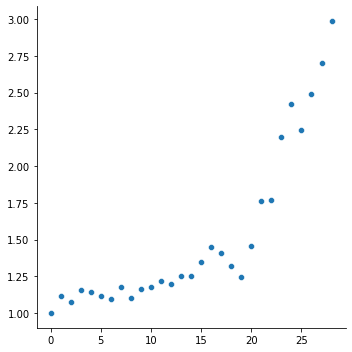

In [ ]:
sns.relplot(data=df);

The values after the year 20 seem to be increasing exponentially.

### Box and whiskers plot

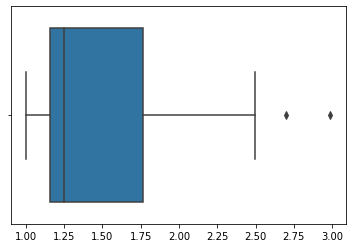

In [ ]:
sns.boxplot(df);

We see two values post the right whisker line here.
We can confirm if they are outliers with further analysis.

### KDE plot

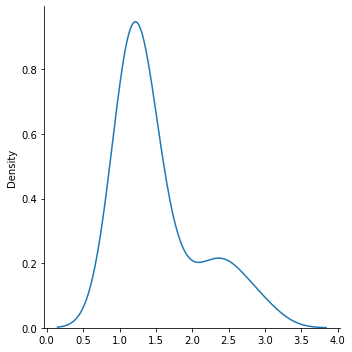

In [ ]:
sns.displot(data=df,kind='kde');

Most of the values are between 0.5 to 2.0

### Histogram

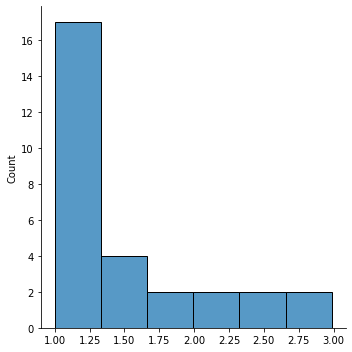

In [ ]:
sns.displot(df);

This histogram shows the number of values *(count)* across intervals.

## Curve fitting

In [ ]:
y = df.values
ymean = np.mean(y)
ymean

1.5196346206896552

In [ ]:
x = df.index
xmean = np.mean(x)
xmean

14.0

In [ ]:
slope = np.sum((x - xmean)*(y-ymean)) / np.sum((x-xmean)**2)
slope

0.05599716995073891

In [ ]:
intercept = ymean - slope * xmean
intercept

0.7356742413793104

### Line curve


The line equation :-  Y = 0.056 X + 0.73 

In [ ]:
predictions = slope * x + intercept

In [ ]:
# type(predictions)

In [ ]:
# np.sqrt(np.sum((predictions-y)**2))

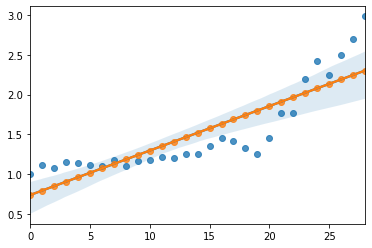

In [ ]:

sns.regplot(data=df, x=df.index,y=df.values)
sns.regplot(data=df, x=df.index,y=predictions);

### Exponential curve

The equation :-  Y = a (1 + r ) **bX

In [49]:
def exPred(X):
    """ X should be df.index. """
    diff = 0

    for i in range(len(X)):
        if (i+1) != l:
            diff += (df.values[i+1] - df.values[i])
    gr = diff/l  # growth rate

    exPredictions = np.zeros(len(X))
    for i in range(len(X)):
        exPredictions[i] = (1+gr)**(0.55*i)
    
    return exPredictions

In [50]:
exPredictions = exPred(df.index)
exPredictions

array([1.        , 1.03713024, 1.07563913, 1.11557787, 1.15699955,
       1.19995922, 1.24451399, 1.29072309, 1.33864795, 1.38835227,
       1.43990212, 1.49336603, 1.54881507, 1.60632295, 1.6659661 ,
       1.72782382, 1.79197834, 1.85851492, 1.92752203, 1.99909138,
       2.07331812, 2.15030092, 2.23014211, 2.31294782, 2.39882813,
       2.48789719, 2.58027341, 2.67607958, 2.77544306])

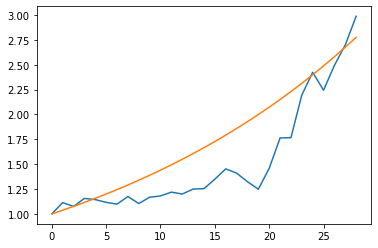

In [51]:
sns.lineplot(x=df.index,y=df.values)
sns.lineplot(x=df.index,y=exPredictions)

# Moving Averages